# question 1

## 
Suppose we have a vocabulary {buy, bought, girl, woman, word, words}, please represent each word using the one-hot encoding.  

**answer**  
Suppose elements in the vector represent whether the word is {buy, bought, girl, woman, word, words} respectively in order, then vector of each word is as follow:  
- buy: [1,0,0,0,0,0]
- bought: [0,1,0,0,0,0]
- girl: [0,0,1,0,0,0]
- woman: [0,0,0,1,0,0]
- word: [0,0,0,0,1,0]
- words: [0,0,0,0,0,1]

## 
Combined with the previous question, what are the drawbacks of doing so? Answer at least two reasons.

**answer**  
- **Sparsity**: each additional word will add one more dimension, but such many dimensions don't really have enriched information, which is not good for optimization 
- **high computational cost**: high dimension will result in high computational cost
- **Expandability**: if the size of vocabulary will grow, we need to adjust all existing vectors.

## 
Given a vocabulary {girl, woman, boy, man}, consider a computation unit with 4 nodes when we use the one-hot
approach to encode the word “girl”:

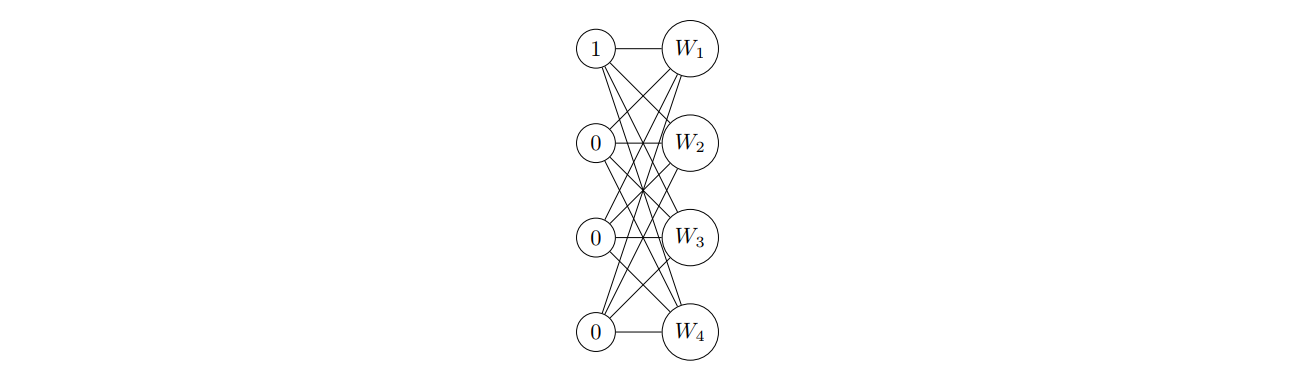

In this case, we need 4 × 4 nodes to maintain the computation unit. Do you have any methods that could better
represent the word in this vocabulary and reduce the amount of nodes to 2 × 4 ? Please give the solution and
explanations.

**answer**  
We can use `binary encoding` to solve the problem, i.e. represent {girl, woman, boy, man} via `[0,0],[0,1],[1,0],[1,1]`  
Binary encoding is more memory-efficient because it uses fewer features than one-hot encoding. One-hot encoding needs 4 features to represent 4 categories, while binary encoding only needs 2. And binary encoding can also reduce the curse of high dimensionality.  
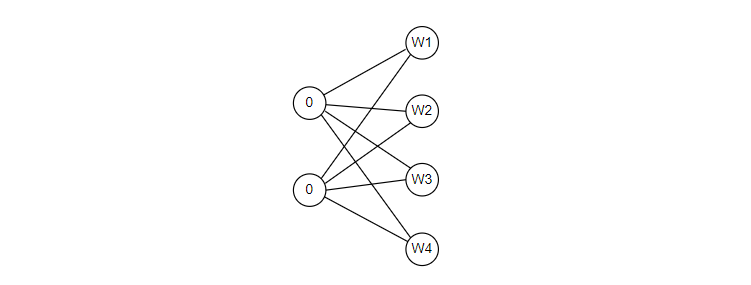

# question2

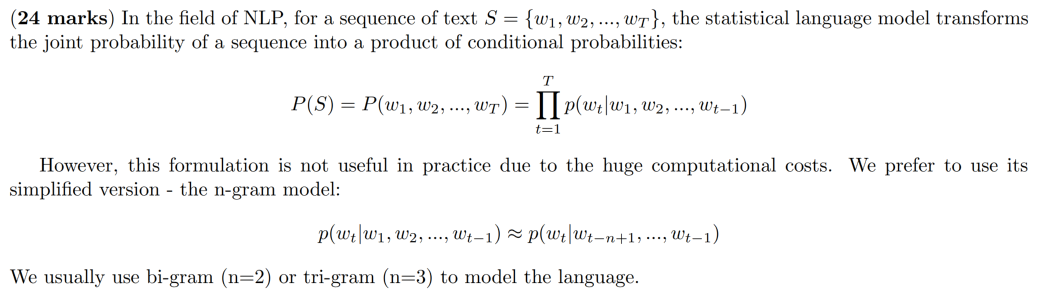

## 
Given the text“the physical meanings of both the complex-valued entity and word embeddings is unknown”,
please list all the bi-gram and tri-gram forms that contains the word “meanings” or “embeddings”. 

**answer**  
`bi-gram of "meanings"` :"physical meanings","meanings of"  
`tri-gram of "meanings"`:"the physical meanings","physical meanings of","meanings of both"   
  
`bi-gram of "embeddings"`:"word embeddings","embeddings is"  
`tri-gram of "embeddings"`:"and word embeddings","word embeddings is","embeddings is unknown" 

## 
What are the disadvantages of n-gram model? 

**answer**  


## 


In [ ]:
!pip install torchtext==0.11.0

In [29]:
import torch
import torchtext
print("PyTorch version: ", torch.__version__)
print("GPU support: ", torch.cuda.is_available())
print("Available devices count: ", torch.cuda.device_count())

ModuleNotFoundError: No module named 'torchtext'

In [28]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

tokenizer = get_tokenizer('basic_english')

def yield_tokens(data):
    for text in data['text']:
        yield tokenizer(text)

vocab = build_vocab_from_iterator(yield_tokens(text), specials=["<unk>", "<pad>"])
vocab.set_default_index(vocab["<unk>"])

ModuleNotFoundError: No module named 'torchtext'

In [3]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [2]:
import torch.nn as nn
import torch.nn.functional as F
class LanguageModeler (nn.Module):
    def __init__ (self,vocab_size,embedding_dim,context_size,hidden_size=128):
        super(LanguageModeler,self).__init__( )
        self.embeddings = nn.Embedding(vocab_size,embedding_dim)
        self.linear1 = nn.Linear(context_size * embedding_dim,hidden_size)
        self.linear2 = nn.Linear(hidden_size,vocab_size)
    def forward(self,inputs) :
        embeds = self.embeddings(inputs).view((1,-1)) # equal to reshape
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out,dim=1)
        return log_probs


In [23]:
text ='the physical meanings of both the complex-valued entity and word embeddings is unknown'
vocab_size = len(text.split())
embedding_dim = 32
context_size = vocab_size
n_epochs = 10
lr=0.01
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [25]:
model = LanguageModeler (vocab_size = vocab_size
                         ,embedding_dim=embedding_dim
                         ,context_size=context_size
                         ,hidden_size=128)
# Training Run
for epoch in range(1, n_epochs + 1):
    optimizer.zero_grad() # Clears existing gradients from previous epoch
    input_seq.to(device)
    output, hidden = model(text)
    loss = criterion(output, target_seq.view(-1).long())
    loss.backward() # Does backpropagation and calculates gradients
    optimizer.step() # Updates the weights accordingly
    
    if epoch%10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Loss: {:.4f}".format(loss.item()))

NameError: name 'input_seq' is not defined

In [ ]:
|class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        
        batch_size = x.size(0)

        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        out = self.fc(out)
        
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden